In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")
# Explore the data
# Check the first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Check the class distribution
class_counts = data['Class'].value_counts()
print(class_counts)

0    284315
1       492
Name: Class, dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data .describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


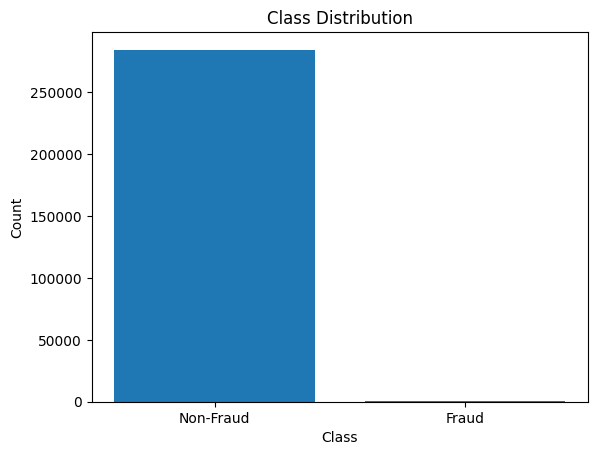

In [ ]:
# Visualize class distribution
plt.bar(class_counts.index, class_counts.values)
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
# Split the data into features (X) and labels (y)
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Address class imbalance using oversampling (SMOTE) or undersampling
# Oversampling with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Undersampling with RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
X_resampled.shape

(454902, 30)

In [ ]:
X.shape

(284807, 30)

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_resampled)  # X_resampled is the oversampled data from Step 1

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)

# The data is now normalized and ready for modeling

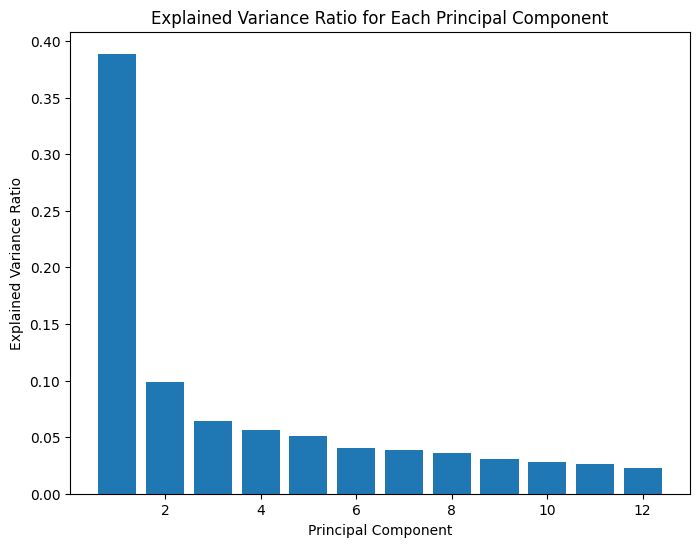

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize the PCA with the desired number of components (you can adjust this)
n_components = 12  # Adjust this based on your dataset and requirements
pca = PCA(n_components=n_components)

# Fit PCA on the normalized training data
X_train_pca = pca.fit_transform(X_train_normalized)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test_normalized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each principal component
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()


In [ ]:
unique_classes = y_resampled.unique()
print(unique_classes)

[0 1]


In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create an Isolation Forest model
iso_forest = IsolationForest()

# Define the hyperparameter grid to search
param_grid = {
    'contamination': [0.05, 0.1],
    'bootstrap': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(iso_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best Hyperparameters: {'bootstrap': True, 'contamination': 0.05}


In [ ]:
model = IsolationForest(contamination=0.05, bootstrap=True, random_state=42)
model.fit(X_train_pca, y_resampled)
y_pred = model.predict(X_test_pca)
y_pred = list(map(lambda x: 1 if x == -1 else 0, y_pred))
# classification_rep = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# print(classification_rep)
print("ROC-AUC:", roc_auc)

Precision: 0.010256410256410256
Recall: 0.10204081632653061
F1-score: 0.01863932898415657
0.5425352505943288


In [ ]:
# You can also perform cross-validation to get more robust results
scores = cross_val_score(model, X_train_pca, y_resampled, cv=5, scoring='accuracy')
print(scores)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

[0.00145085 0.00160473 0.45515498 0.8932073  0.89171246]
Cross-Validation ROC AUC: 0.45 (+/- 0.80)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Local Outlier Factor model
lof = LocalOutlierFactor()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors':[20,30,50]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lof, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best Hyperparameters: {'n_neighbors': 20}


In [ ]:
model = LocalOutlierFactor(n_neighbors = 20, novelty=True, contamination='auto')
model.fit(X_train_pca, y_resampled)
y_pred = model.predict(X_test_pca)
y_pred = list(map(lambda x: 1 if x == -1 else 0, y_pred))
# classification_rep = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
# print(classification_rep)
print(roc_auc)

Precision: 0.02247191011235955
Recall: 0.7959183673469388
F1-score: 0.04370972261137573
0.8681248420865251


In [ ]:
scores = cross_val_score(model, X_train_pca, y_resampled, cv=5, scoring='accuracy')
print(scores)
print(f"Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

[0.00158275 0.00180257 0.48500769 0.96587162 0.96687184]
Cross-Validation Accuracy: 0.48 (+/- 0.86)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


# Create an MLPClassifier model
mlp_classifier = MLPClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': ['constant', 'adaptive', 'invscaling'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca, y_resampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'learning_rate': 'invscaling'}


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np


# Create an MLPClassifier model
mlp_classifier = MLPClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train_pca, y_resampled)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'alpha': 0.001}


In [ ]:
model = MLPClassifier(hidden_layer_sizes=(20, 10, 20), activation='relu', solver='adam', alpha=0.001, learning_rate='invscaling',random_state=42)
model.fit(X_train_pca, y_resampled)
y_pred = model.predict(X_test_pca)
# classification_rep = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
roc_auc = roc_auc_score(y_test, y_pred)
# print(classification_rep)
print(roc_auc)

Precision: 0.3018867924528302
Recall: 0.8163265306122449
F1-score: 0.44077134986225897
0.9065365770675181


In [ ]:
scores = cross_val_score(model, X_train_pca, y_resampled, cv=3, scoring='accuracy')
print(scores)
print(f"Cross-Validation ROC AUC: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

[0.99689384 0.99715763 0.9974544 ]
Cross-Validation ROC AUC: 1.00 (+/- 0.00)


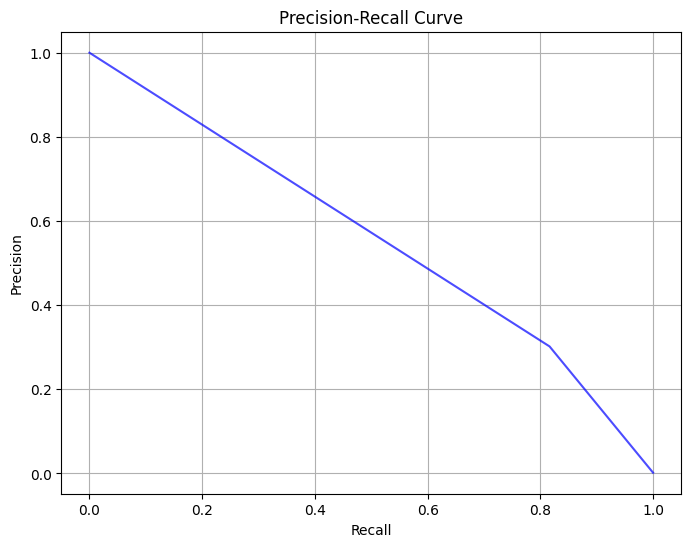

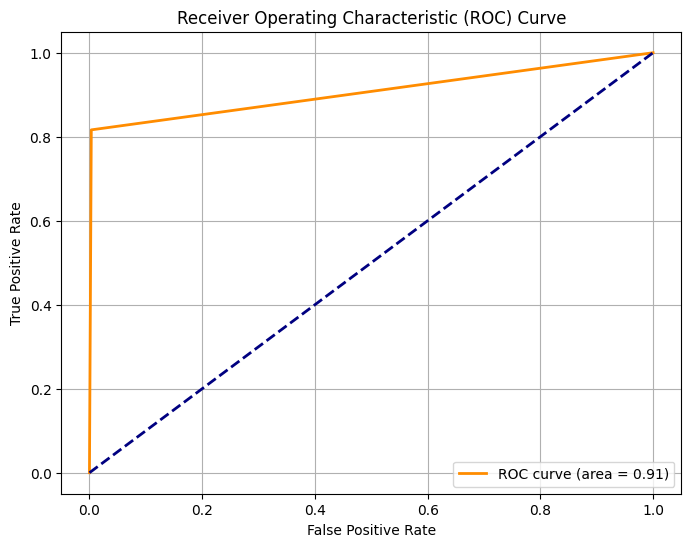

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Assuming you have true labels (y_true) for your test data

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', alpha=0.7)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Receiver Operating Characteristic (ROC) Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


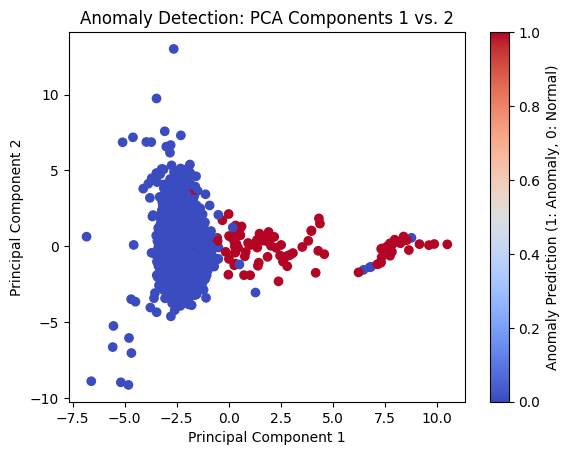

In [ ]:
# Assuming you have already trained an anomaly detection model (e.g., Isolation Forest) and have predictions in y_pred

# Create a scatter plot of PCA-transformed data points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 9], c=y_pred, cmap='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Anomaly Detection: PCA Components 1 vs. 2')
plt.colorbar(label='Anomaly Prediction (1: Anomaly, 0: Normal)')
plt.show()

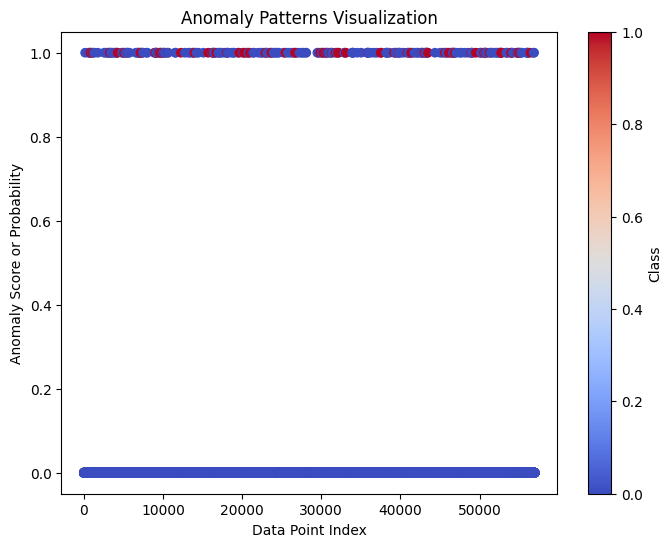

In [ ]:
# Assuming you have already trained a model (e.g., LOF or Isolation Forest)
y_pred = model.predict(X_test_pca)  # Make predictions on test data

# Create a scatter plot of anomaly scores or prediction probabilities
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X_test_pca)), y_pred, c=y_test, cmap='coolwarm', marker='o')
plt.title('Anomaly Patterns Visualization')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Score or Probability')
plt.colorbar(label='Class')
plt.show()
